# Bevel Choice Behavior Notebook

In [20]:
#imports
import os
import glob
import pandas as pd
import numpy as np
import matplotlib as plot

For one file... import data 

In [10]:
path = '/Users/jennygilbert/Documents/bevel_choice/by_participant_txtfiles'
print(path)

df = pd.read_csv(os.path.join(path,'01.txt'), sep='\t', header = None, names = ['ID','run','img_pair','choice','side','outcome','matched','RT'])
df

/Users/jennygilbert/Documents/bevel_choice/by_participant_txtfiles


,ID,run,img_pair,choice,side,outcome,matched,RT
0,1,run01,EF,F,1,reward,mismatched,1.569796
1,1,run01,CD,D,2,punish,matched,1.601124
2,1,run01,CD,D,2,punish,matched,1.600702
3,1,run01,CD,Miss,Miss,Miss,Miss,Miss
4,1,run01,AB,A,2,reward,matched,1.580793
5,1,run01,AB,B,2,reward,mismatched,1.564219
6,1,run01,AB,B,1,punish,matched,1.612839
7,1,run01,CD,D,2,punish,matched,1.594208
8,1,run01,CD,C,1,reward,matched,1.611155
9,1,run01,AB,A,1,punish,mismatched,1.594223


In [11]:
#Goal = calculate probability of each shape as the sum of number of previous rewards/sum of number of previous reinforcers
#running matched/total reinforcers = A prob of correct
#running mismatched/total reinforcers = B prob of being correct

#Split df into AB
df1 = df[df['img_pair'] == 'AB']
df1

,ID,run,img_pair,choice,side,outcome,matched,RT
4,1,run01,AB,A,2,reward,matched,1.580793
5,1,run01,AB,B,2,reward,mismatched,1.564219
6,1,run01,AB,B,1,punish,matched,1.612839
9,1,run01,AB,A,1,punish,mismatched,1.594223
12,1,run01,AB,A,2,punish,mismatched,1.590193
15,1,run01,AB,A,1,punish,mismatched,1.587054
17,1,run01,AB,A,1,reward,matched,1.602018
18,1,run01,AB,B,2,punish,matched,1.600867
20,1,run01,AB,Miss,Miss,Miss,Miss,Miss
21,1,run01,AB,A,2,reward,matched,1.614960


In [12]:
cond = (df1.matched == 'matched')
df1['matched_running'] = cond.cumsum().where(cond,999).astype(int)
df1

cond1 = (df1.matched == 'mismatched')
df1['mismatched_running'] = cond1.cumsum().where(cond1,999).astype(int)
df1

cond2 = (df1.matched != 'Miss')
df1['reinforcer_running'] = cond2.cumsum().where(cond2,999).astype(int)
df1

df1 = df1.replace(999, np.nan)
df1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

,ID,run,img_pair,choice,side,outcome,matched,RT,matched_running,mismatched_running,reinforcer_running
4,1,run01,AB,A,2,reward,matched,1.580793,1.0,NaN,1.0
5,1,run01,AB,B,2,reward,mismatched,1.564219,NaN,1.0,2.0
6,1,run01,AB,B,1,punish,matched,1.612839,2.0,NaN,3.0
9,1,run01,AB,A,1,punish,mismatched,1.594223,NaN,2.0,4.0
12,1,run01,AB,A,2,punish,mismatched,1.590193,NaN,3.0,5.0
15,1,run01,AB,A,1,punish,mismatched,1.587054,NaN,4.0,6.0
17,1,run01,AB,A,1,reward,matched,1.602018,3.0,NaN,7.0
18,1,run01,AB,B,2,punish,matched,1.600867,4.0,NaN,8.0
20,1,run01,AB,Miss,Miss,Miss,Miss,Miss,NaN,NaN,NaN
21,1,run01,AB,A,2,reward,matched,1.614960,5.0,NaN,9.0


In [13]:
df1['a_corr_prob'] = df1.matched_running / df1.reinforcer_running
df1['b_corr_prob'] = df1.mismatched_running / df1.reinforcer_running
df1

,ID,run,img_pair,choice,side,outcome,matched,RT,matched_running,mismatched_running,reinforcer_running,a_corr_prob,b_corr_prob
4,1,run01,AB,A,2,reward,matched,1.580793,1.0,NaN,1.0,1.000000,NaN
5,1,run01,AB,B,2,reward,mismatched,1.564219,NaN,1.0,2.0,NaN,0.500000
6,1,run01,AB,B,1,punish,matched,1.612839,2.0,NaN,3.0,0.666667,NaN
9,1,run01,AB,A,1,punish,mismatched,1.594223,NaN,2.0,4.0,NaN,0.500000
12,1,run01,AB,A,2,punish,mismatched,1.590193,NaN,3.0,5.0,NaN,0.600000
15,1,run01,AB,A,1,punish,mismatched,1.587054,NaN,4.0,6.0,NaN,0.666667
17,1,run01,AB,A,1,reward,matched,1.602018,3.0,NaN,7.0,0.428571,NaN
18,1,run01,AB,B,2,punish,matched,1.600867,4.0,NaN,8.0,0.500000,NaN
20,1,run01,AB,Miss,Miss,Miss,Miss,Miss,NaN,NaN,NaN,NaN,NaN
21,1,run01,AB,A,2,reward,matched,1.614960,5.0,NaN,9.0,0.555556,NaN


In [22]:
df1.to_csv('01_test.csv')

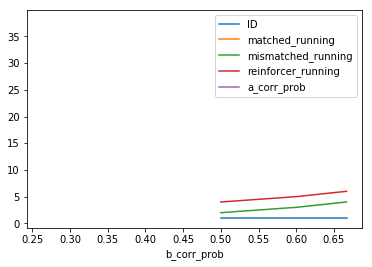